# Reinforment Learning - Mario

The goal of this project is to train a reinforcement agent to play the classic Mario game.

The game environment is given by https://pypi.org/project/gym-super-mario-bros/

The code below shows an agent that is taking a random action at each time step.

In [52]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import numpy as np

maxStorage = 10

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
frameBuffer = np.zeros((maxStorage, 240, 256, 3), dtype=np.uint8)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    frame = env.render(mode = 'rgb_array')
    if step < maxStorage:
        frameBuffer[step] = frame

env.close()

/opt/anaconda3/envs/mlEnv/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# Understanding the Environment

The objective of this game is for the agent to move as far right as possible, as fast as possible without dying.

The reward function (r) of the environment is defined as the combination of position (v), game clock between frame (c) and death penalty (d)

r = v + c + d , where r is clipped between (-15,15)

v: This is the difference between the agent's x positions between frames (encourage the agent to move right)  
v = x1 - x0  
moving right: v > 0  
moving left : v < 0  
not moving  : v = 0  

c: This is the difference between the game clock between frames (encourage the agent to no stand still)  
c = c0 - c1,   
where, c0 is the clock reading before the step and c1 is the clock reading after the step.

d: This is the penalty that penalizes the agent from dying (encourage the agent to stay alive in the game)  
alive: d = 0  
dead : d = -15  

In [53]:
print("Available Action: ", env.get_action_meanings())

Available Action:  ['NOOP', 'right', 'right A', 'right B', 'right A B', 'A', 'left']


Game Screen Size: (240, 256, 3)


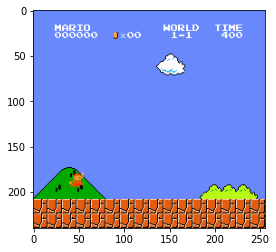

In [59]:
import random
import matplotlib.pyplot as plt

randomImg = random.randrange(0,maxStorage-1,1)
print("Game Screen Size:", frameBuffer[randomImg].shape)
plt.imshow(frameBuffer[randomImg])

# Preprocessing Game Screen for training

The Game Screen is an image with the shape of (240, 256, 3). In order to increase the speed of training, several steps were taken to reduce the size of the image. First, the image will be converted into a grayscale image. Next, the image will be cropped vertically, as we don't need the information on the score and time on the game screen (These information will be provide through the reward function). Therefore, all images will go through the preprocessImage function below.

In [60]:
def preprocessImage(image):
    output = cv2.cvtColor(frameBuffer[2], cv2.COLOR_RGB2GRAY)
    output = output[100:, :]
    return output

New Image Size:  (140, 256)


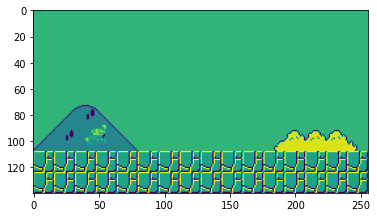

In [61]:
processedImage = preprocessImage(frameBuffer[randomImg])
plt.imshow(processedImage)
print("New Image Size: ", processedImage.shape)